# Project #2: Building a Transactional Fraud Detection Model  
### Submitted by: Renu Prakash  

---

## Business Goal  
Fraudulent credit card transactions often go undetected due to the rarity of fraud cases in real-world data—posing serious financial and reputational risks for banks and payment processors. The goal of this project is to develop a robust machine learning model capable of identifying fraudulent behavior within highly imbalanced transactional data, enabling early intervention and risk mitigation.

---

## Project Overview  
This project presents a full fraud detection modeling workflow using the publicly available **Credit Card Fraud Detection dataset**. The modeling task is framed as a **binary classification problem**, with the key challenge being the **extreme class imbalance**—fraud makes up less than 0.2% of all transactions.

The notebook begins with a **baseline Decision Tree** to establish foundational understanding and progresses toward a more scalable solution using a **Random Forest Classifier**. The pipeline is enhanced through thoughtful preprocessing and performance tuning.

### Core Steps:
- Adjusting the **train-test split strategy** to preserve class distribution  
- Applying **random undersampling** to handle imbalance  
- Implementing and tuning a **Random Forest model** (`n_estimators`, `max_depth`)  
- Evaluating performance using fraud-relevant metrics:
  - Precision  
  - Recall  
  - F1-Score  
  - ROC-AUC  
- Comparing the effectiveness of **Decision Tree vs. Random Forest**  

---

## Dataset Summary  
**Source**: [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)  
- Real transactions by European cardholders in September 2013  
- Features include:  
  - `Time`, `Amount`, and anonymized PCA components (`V1`–`V28`)  
  - `Class` label: 1 = Fraud, 0 = Legitimate

---

This project is part of my portfolio in **Fraud Analytics with AI/ML**, and it demonstrates practical strategies for handling class imbalance, tuning model performance, and ensuring interpretability—key considerations when deploying fraud detection systems in high-stakes environments.


Dataset shape: (284807, 31)

Dataset summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2

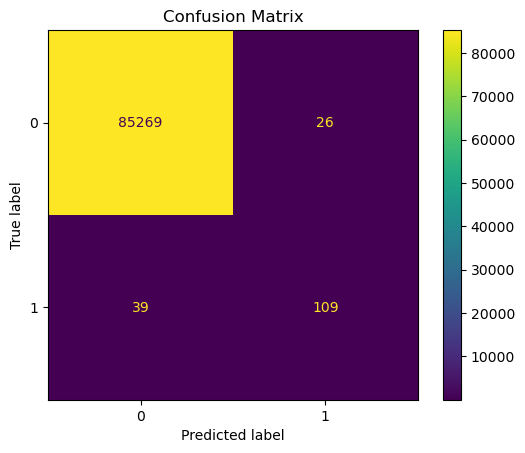

In [1]:
# 2. Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 3. Load the Dataset
df = pd.read_csv('creditcard.csv')

# Quick look at the data
print("Dataset shape:", df.shape)
print("\nDataset summary statistics:")
print(df.describe())

# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))

# 4. Prepare the Data
# Drop 'Time' feature, use 'Amount' and PCA features
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Build a Simple Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate the Model
y_pred = model.predict(X_test)

print("\nModel Evaluation Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()



# Modeling with RandomForest Classifier:

Dataset shape: (284807, 31)

Dataset summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2

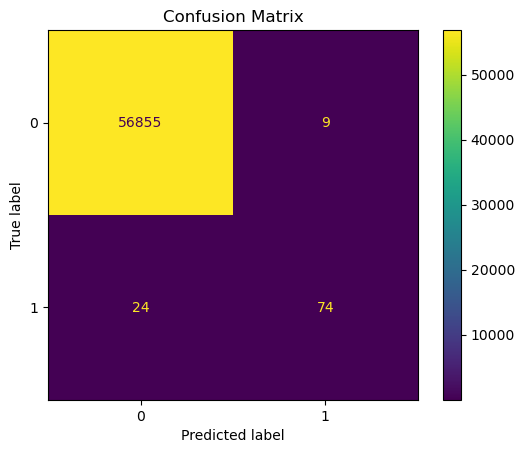

In [2]:
# 2. Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 3. Load the Dataset
df = pd.read_csv('creditcard.csv')

# Quick look at the data
print("Dataset shape:", df.shape)
print("\nDataset summary statistics:")
print(df.describe())

# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))

# 4. Prepare the Data
# Drop 'Time' feature, use 'Amount' and PCA features
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Build a Random Forest Model
# Replace Decision Tree with Random Forest Classifier

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate the Model
y_pred = model.predict(X_test)

print("\nModel Evaluation Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()


### Interpretation and Comparison of Results - Decision Tree vs Random Forest for fraud classification  - 

| Metric                  | Decision Tree | Random Forest |
|--------------------------|---------------|---------------|
| Precision                | 0.8074        | 0.8916        |
| Recall                   | 0.7365        | 0.7551        |
| F1-Score                 | 0.7703        | 0.8177        |
| ROC-AUC                  | 0.8681        | 0.8775        |
| True Positives (TP)      | 85269         | 56855         |
| False Positives (FP)     | 26            | 9             |
| False Negatives (FN)     | 39            | 24            |
| True Negatives (TN)      | 109           | 74            |


### Insights - Changes in Precision and Recall : 

As shown in the above results, the Random Forest model improved both precision and recall compared to the Decision Tree.

 - Precision increased from 0.8074 to 0.8916, indicating fewer false alarms, boosting confidence in the fraud detection.
   The false positives has reduced significantly from 26 to 9.
 - Recall has improved from 0.7365 to 0.7551, showing that more true fraud cases were captured (ie. Fewer missed frauds).
   The false negatives has reduced significantly from 39 to 24.                                                                                             

While increasing precision can reduce recall, but Random Forest here slightly improves both metrics ,which is a good sign of 
overall balanced performance.


### Insights - Trade-offs in Performance :

<b>F1-Score</b>
- The Random Forest model achieved a higher F1-score (0.8177) compared to the Decision Tree’s 0.7703.
- It shows that Random Forest model better balances precision and recall, a crucial trade-off in fraud detection. 
- Focusing solely on accuracy can hide poor fraud identification, but here Random Forest improves both metrics— identifying more fraud cases while keeping false alarms low. 

 This makes it particularly effective for handling rare fraud events in imbalanced datasets like this one.

<b>ROC-AUC </b>
- ROC-AUC measures overall discriminatory power. 
- Random Forest’s slight improvement in ROC-AUC (0.8775 vs. 0.8681) reflects better separation of fraud and legitimate transactions, 
  though sometimes such improvements can come at the cost of missing rare fraud cases or causing more false alerts.

<b>True/False Positives and Negatives</b>
- Random Forest has fewer false positives and false negatives, confirming it’s more robust in catching fraud and avoiding false alarms.




### Overall Comparison Summary -

- The Random Forest (RF) model outperformed the Decision Tree (DT) across key metrics in fraud detection.
- RF achieved a higher F1-score , showing a better balance between precision and recall—critical in handling imbalanced datasets where fraud is rare. RF also slightly improved ROC-AUC , indicating stronger ability to distinguish fraud from non-fraud transactions. Importantly, RF reduced both false positives and false negatives compared to Decision Trees. This means Random Forest model not only identifies more real fraud cases but also avoids unnecessary alerts to legitimate users. Overall, Random Forest provides more reliable and robust performance for fraud detection, making it a better choice for minimizing risk while maintaining customer experience.

### Additional Task : Data Balancing, Hypertuning Parameters, Analysing the results

- Splitting data (e.g., 70/30, 80/20) as we did in above two models, allocates samples for training/testing, 
However, it doesn’t address class imbalance - As we discovered in Exploratory Data Analysis phase, Fraud Cases are Only ~0.17% 
(Class column mean = 0.001727), indicating a highly imbalanced dataset whereas Non-Fraud Cases are in Majority.

- Since our dataset is highly imbalanced, where rare events(fraud) matter most , balancing this datset is crucial to avoid 
misleading accuracy and build a robust fraud detection model. 

- For that, we will use Random undersampling to ensure that the model doesn’t get biased towards the majority class (non-fraud) and can effectively 
learn the minority class (fraud). 



Results for n_estimators=100, max_depth=3
Precision: 0.10714285714285714
Recall: 0.8877551020408163
F1-Score: 0.1912087912087912
ROC-AUC: 0.9375026917069587


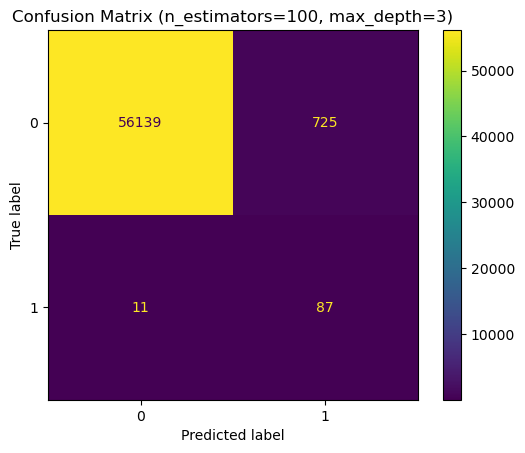


Results for n_estimators=200, max_depth=5
Precision: 0.06816421378776143
Recall: 0.8979591836734694
F1-Score: 0.12670986321094313
ROC-AUC: 0.9384017218311071


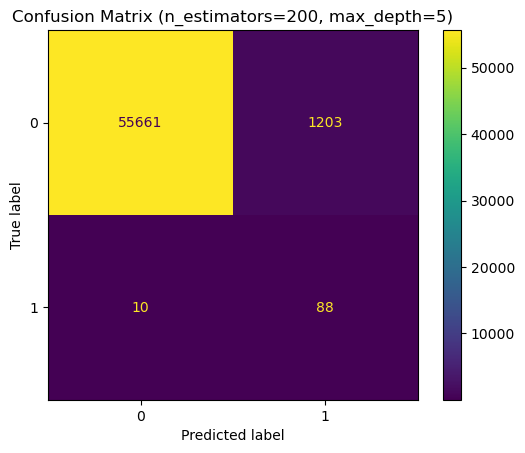


Results for n_estimators=300, max_depth=7
Precision: 0.056664520283322604
Recall: 0.8979591836734694
F1-Score: 0.10660205935796487
ROC-AUC: 0.9360979795688674


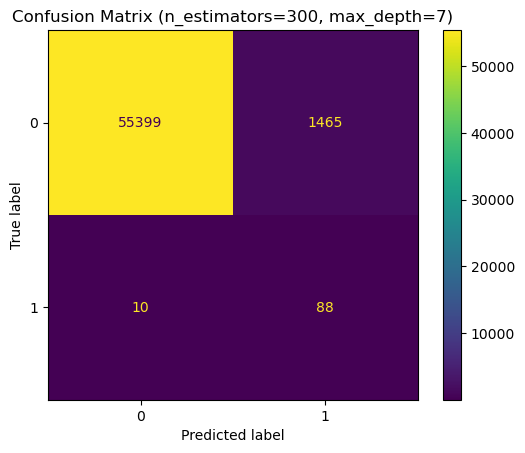

In [9]:
# Balance the training data using random undersampling.

# Import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler


# Handle class imbalance with Random Undersampling

# passing X_train, y_train variables after train-test split from above code module-
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train) 

# Function to train and evaluate a Random Forest model

def train_evaluate_rf(X_train, y_train, X_test, y_test, n_estimators, max_depth):
    
    # Build a Random Forest Model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate the Model
    y_pred = model.predict(X_test)
    
    
    # Print evaluation metrics
    print(f"\nResults for n_estimators={n_estimators}, max_depth={max_depth}")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix (n_estimators={n_estimators}, max_depth={max_depth})")
    plt.show()


# Train andn Evaluate Hypertuning parameters on balanced data-

train_evaluate_rf(X_train_balanced, y_train_balanced, X_test, y_test, n_estimators=100, max_depth=3)
train_evaluate_rf(X_train_balanced, y_train_balanced, X_test, y_test, n_estimators=200, max_depth=5)
train_evaluate_rf(X_train_balanced, y_train_balanced, X_test, y_test, n_estimators=300, max_depth=7)


### Analysis and Comparison of results after Hyperparamater tuning -


- The model with 100 trees and max_depth=3 performed the best overall.
  It achieved the highest precision (0.1071) and F1-score (0.1912), while maintaining a very high recall (0.8878) and a competitive ROC-AUC (0.9375).
- Although the 200-tree model has slightly higher recall and ROC-AUC, it suffered from a substantial drop in precision, leading to a worse F1-score.
- In terms of fraud detection, Since balancing precision and recall (via F1-score) is usually more important than maximizing ROC-AUC alone,  
  Therefore, the 100-tree, max_depth=3 configuration is preferable here. 